<a href="https://colab.research.google.com/github/ad5454/SDC-PROJECTS/blob/main/SDC_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Getting Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile

zip_ref = zipfile.ZipFile("drive/My Drive/archive.zip","r")
zip_ref.extractall()
zip_ref.close()

In [4]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

### Data Splitting

In [5]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import splitfolders
splitfolders.ratio('/content/train', output="output2", seed=1337, ratio=(0.8, 0.1, 0.1))

Copying files: 39209 files [00:06, 6066.59 files/s]


In [7]:
train_dir="/content/output2/train"
test_dir="/content/output2/test/"

### Data Processing

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')
     

Found 31367 images belonging to 43 classes.
Found 3922 images belonging to 43 classes.


In [9]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21'
 '22' '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35'
 '36' '37' '38' '39' '4' '40' '41' '42' '5' '6' '7' '8' '9']


In [10]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

### Baseline model

In [11]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D,Dense

In [12]:
#CREATING MODEL_04


model_04 = Sequential()

#CONVOLUTIONAL LAYER
model_04.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_04.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_04.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))

#MAXPOOLING LAYER
model_04.add(MaxPool2D(pool_size=(2,2)))

#CONVOLUTIONAL LAYER
model_04.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_04.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_04.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))

#MAXPOOLING LAYER
model_04.add(MaxPool2D(pool_size=(2,2)))

#CONVOLUTIONAL LAYER
model_04.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_04.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_04.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))

#MAXPOOLING LAYER
model_04.add(MaxPool2D(pool_size=(2,2)))

#FLATTEN LAYER TO MATCH THE SIZE OF THE OUTPUT
model_04.add(Flatten())

model_04.add(Dense(256, activation='relu'))

#OUTPUT LAYER
model_04.add(Dense(43, activation='softmax'))

#COMPILE THE MODEL_04

model_04.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

#FITTING THE MODEL_04

history_04 = model_04.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))
     

Epoch 1/5
981/981 [==============================] - 159s 139ms/step - loss: 0.9091 - accuracy: 0.7395 - val_loss: 0.1402 - val_accuracy: 0.9612
Epoch 2/5
981/981 [==============================] - 133s 136ms/step - loss: 0.0824 - accuracy: 0.9755 - val_loss: 0.2073 - val_accuracy: 0.9383
Epoch 3/5
981/981 [==============================] - 129s 132ms/step - loss: 0.0437 - accuracy: 0.9867 - val_loss: 0.0998 - val_accuracy: 0.9740
Epoch 4/5
981/981 [==============================] - 133s 135ms/step - loss: 0.0319 - accuracy: 0.9903 - val_loss: 0.0672 - val_accuracy: 0.9834
Epoch 5/5
981/981 [==============================] - 128s 130ms/step - loss: 0.0339 - accuracy: 0.9893 - val_loss: 0.0728 - val_accuracy: 0.9827


In [13]:
model_04.evaluate(test_data)

123/123 [==============================] - 7s 55ms/step - loss: 0.0728 - accuracy: 0.9827


[0.0728408619761467, 0.9826619029045105]

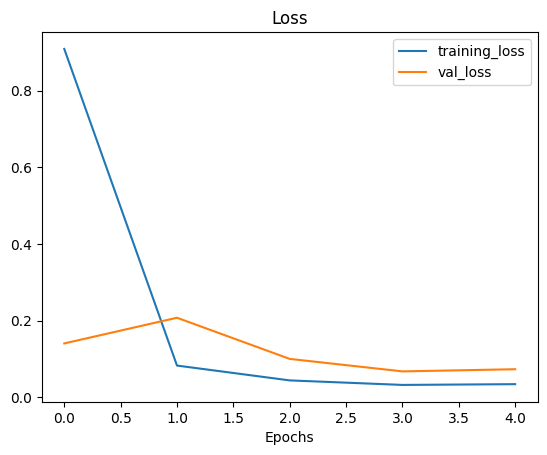

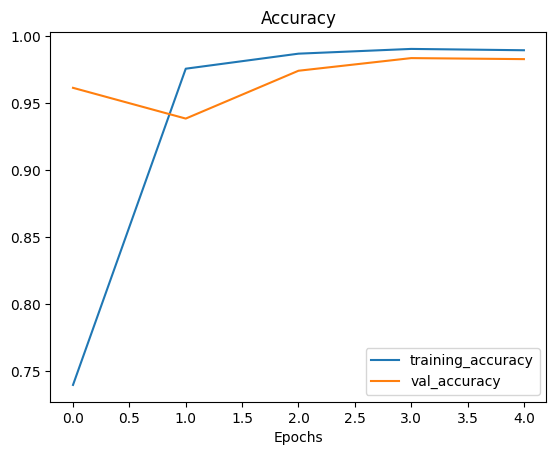

In [14]:
plot_loss_curves(history_04)

In [15]:
#SUMMARY OF MODEL_04

model_04.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 32)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 107, 107, 32)      9248      
                                                                 
 conv2d_4 (Conv2D)           (None, 105, 105, 32)      9248      
                                                        

### NEXT MODEL

In [16]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D,Dense

In [17]:
#CREATING MODEL_05


model_05 = Sequential()

#CONVOLUTIONAL LAYER
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))

#MAXPOOLING LAYER
model_05.add(MaxPool2D(pool_size=(2,2)))

#CONVOLUTIONAL LAYER
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))

#MAXPOOLING LAYER
model_05.add(MaxPool2D(pool_size=(2,2)))

#CONVOLUTIONAL LAYER
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))

#MAXPOOLING LAYER
model_05.add(MaxPool2D(pool_size=(2,2)))

#CONVOLUTIONAL LAYER
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))

#MAXPOOLING LAYER
model_05.add(MaxPool2D(pool_size=(2,2)))

#FLATTEN LAYER TO MATCH THE SIZE OF THE OUTPUT
model_05.add(Flatten())

model_05.add(Dense(256, activation='relu'))

#OUTPUT LAYER
model_05.add(Dense(43, activation='softmax'))

#COMPILE THE MODEL_05

model_05.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

#FITTING THE MODEL_05

history_05 = model_05.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
981/981 [==============================] - 180s 174ms/step - loss: 1.1057 - accuracy: 0.6953 - val_loss: 0.1258 - val_accuracy: 0.9653
Epoch 2/5
981/981 [==============================] - 168s 171ms/step - loss: 0.0808 - accuracy: 0.9773 - val_loss: 0.0962 - val_accuracy: 0.9760
Epoch 3/5
981/981 [==============================] - 167s 170ms/step - loss: 0.0453 - accuracy: 0.9870 - val_loss: 0.0883 - val_accuracy: 0.9791
Epoch 4/5
981/981 [==============================] - 167s 170ms/step - loss: 0.0408 - accuracy: 0.9880 - val_loss: 0.0714 - val_accuracy: 0.9814
Epoch 5/5
981/981 [==============================] - 171s 174ms/step - loss: 0.0232 - accuracy: 0.9931 - val_loss: 0.0575 - val_accuracy: 0.9885


In [18]:
model_05.evaluate(test_data)

123/123 [==============================] - 6s 46ms/step - loss: 0.0575 - accuracy: 0.9885


[0.057479582726955414, 0.9885262846946716]

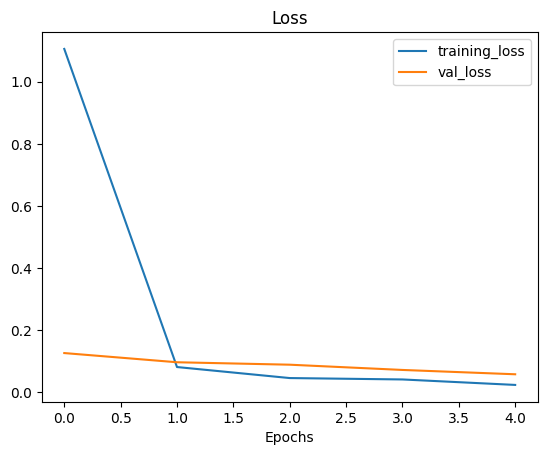

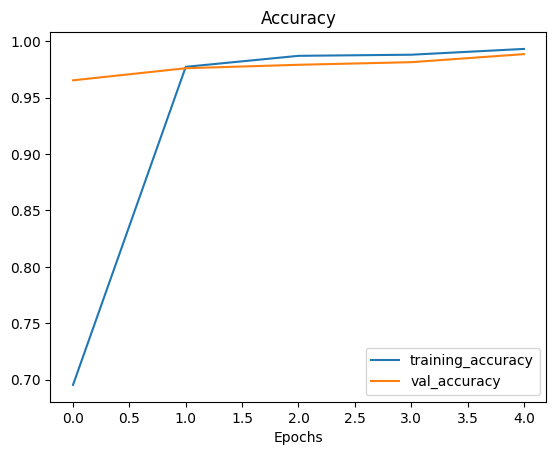

In [19]:
plot_loss_curves(history_05)

In [20]:
#SUMMARY OF MODEL_04

model_05.summary()
     

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 conv2d_11 (Conv2D)          (None, 218, 218, 32)      9248      
                                                                 
 conv2d_12 (Conv2D)          (None, 216, 216, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 108, 108, 32)     0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 106, 106, 32)      9248      
                                                      

### PREDICTIONS

In [21]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [22]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);
     

In [23]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
# Label Overview
classes = [ 'Speed limit (20km/h)',
            'Speed limit (30km/h)', 
            'Speed limit (50km/h)', 
            'Speed limit (60km/h)', 
            'Speed limit (70km/h)', 
            'Speed limit (80km/h)', 
            'End of speed limit (80km/h)', 
            'Speed limit (100km/h)', 
            'Speed limit (120km/h)', 
            'No passing', 
            'No passing veh over 3.5 tons', 
            'Right-of-way at intersection', 
            'Priority road', 
            'Yield', 
            'Stop', 
            'No vehicles', 
            'Veh > 3.5 tons prohibited', 
            'No entry', 
            'General caution', 
            'Dangerous curve left', 
            'Dangerous curve right', 
            'Double curve', 
            'Bumpy road', 
            'Slippery road', 
            'Road narrows on the right', 
            'Road work', 
            'Traffic signals', 
            'Pedestrians', 
            'Children crossing', 
            'Bicycles crossing', 
            'Beware of ice/snow',
            'Wild animals crossing', 
            'End speed + passing limits', 
            'Turn right ahead', 
            'Turn left ahead', 
            'Ahead only', 
            'Go straight or right', 
            'Go straight or left', 
            'Keep right', 
            'Keep left', 
            'Roundabout mandatory', 
            'End of no passing', 
            'End no passing veh > 3.5 tons' ]


In [24]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21'
 '22' '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35'
 '36' '37' '38' '39' '4' '40' '41' '42' '5' '6' '7' '8' '9']


In [25]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round
  

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {classes[int(pred_class)]}")
  # plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


1/1 [==============================] - 1s 579ms/step


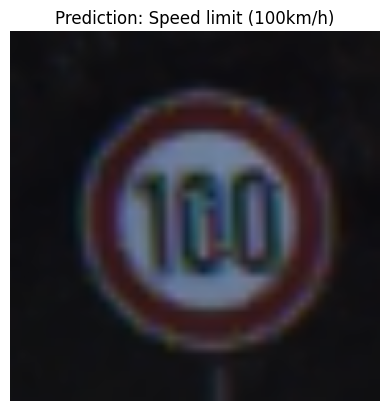

In [26]:
# Make a prediction using efficienet_2_model
pred_and_plot(model=model_05, 
              filename="/content/test/00011.png", 
              class_names=class_names)

1/1 [==============================] - 0s 22ms/step


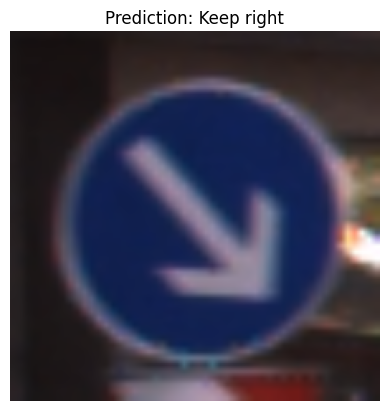

In [27]:
# Make a prediction using efficienet_2_model
pred_and_plot(model=model_05, 
              filename="/content/test/00005.png", 
              class_names=class_names)

1/1 [==============================] - 0s 43ms/step


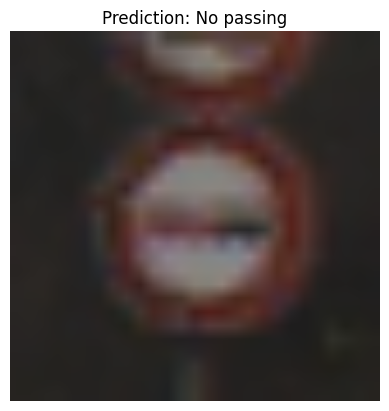

In [28]:
# Make a prediction using efficienet_2_model
pred_and_plot(model=model_05, 
              filename="/content/test/00015.png", 
              class_names=class_names)